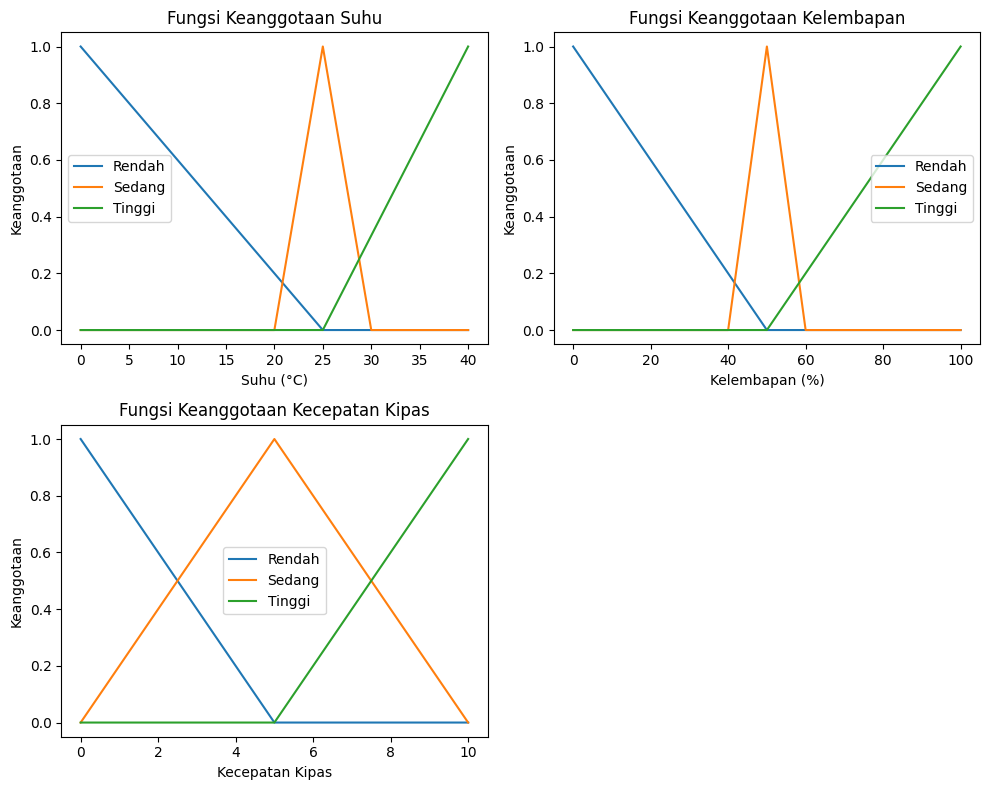

ModuleNotFoundError: No module named 'networkx'

In [2]:
# Import libraries
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# 1. Mendefinisikan variabel input (Suhu dan Kelembapan)
suhu = np.arange(0, 41, 1)  # Suhu dalam derajat Celsius (0-40)
kelembapan = np.arange(0, 101, 1)  # Kelembapan dalam persentase (0-100%)

# 2. Mendefinisikan variabel output (Kecepatan Kipas)
kecepatan_kipas = np.arange(0, 11, 1)  # Kecepatan kipas (0-10), 0 = mati, 10 = maksimum

# 3. Fungsi Keanggotaan Fuzzy untuk Suhu
suhu_rendah = fuzz.trimf(suhu, [0, 0, 25])  # Rendah
suhu_sedang = fuzz.trimf(suhu, [20, 25, 30])  # Sedang
suhu_tinggi = fuzz.trimf(suhu, [25, 40, 40])  # Tinggi

# 4. Fungsi Keanggotaan Fuzzy untuk Kelembapan
kelembapan_rendah = fuzz.trimf(kelembapan, [0, 0, 50])  # Rendah
kelembapan_sedang = fuzz.trimf(kelembapan, [40, 50, 60])  # Sedang
kelembapan_tinggi = fuzz.trimf(kelembapan, [50, 100, 100])  # Tinggi

# 5. Fungsi Keanggotaan Fuzzy untuk Kecepatan Kipas
kipas_rendah = fuzz.trimf(kecepatan_kipas, [0, 0, 5])  # Kecepatan Rendah
kipas_sedang = fuzz.trimf(kecepatan_kipas, [0, 5, 10])  # Kecepatan Sedang
kipas_tinggi = fuzz.trimf(kecepatan_kipas, [5, 10, 10])  # Kecepatan Tinggi

# 6. Plot fungsi keanggotaan untuk visualisasi
plt.figure(figsize=(10, 8))

# Plot suhu
plt.subplot(2, 2, 1)
plt.plot(suhu, suhu_rendah, label='Rendah')
plt.plot(suhu, suhu_sedang, label='Sedang')
plt.plot(suhu, suhu_tinggi, label='Tinggi')
plt.title('Fungsi Keanggotaan Suhu')
plt.xlabel('Suhu (°C)')
plt.ylabel('Keanggotaan')
plt.legend()

# Plot kelembapan
plt.subplot(2, 2, 2)
plt.plot(kelembapan, kelembapan_rendah, label='Rendah')
plt.plot(kelembapan, kelembapan_sedang, label='Sedang')
plt.plot(kelembapan, kelembapan_tinggi, label='Tinggi')
plt.title('Fungsi Keanggotaan Kelembapan')
plt.xlabel('Kelembapan (%)')
plt.ylabel('Keanggotaan')
plt.legend()

# Plot kecepatan kipas
plt.subplot(2, 2, 3)
plt.plot(kecepatan_kipas, kipas_rendah, label='Rendah')
plt.plot(kecepatan_kipas, kipas_sedang, label='Sedang')
plt.plot(kecepatan_kipas, kipas_tinggi, label='Tinggi')
plt.title('Fungsi Keanggotaan Kecepatan Kipas')
plt.xlabel('Kecepatan Kipas')
plt.ylabel('Keanggotaan')
plt.legend()

plt.tight_layout()
plt.show()

# 7. Aturan Fuzzy: Misalnya berdasarkan suhu dan kelembapan, tentukan kecepatan kipas
# Jika suhu tinggi dan kelembapan tinggi -> Kecepatan Kipas Tinggi
# Jika suhu sedang dan kelembapan sedang -> Kecepatan Kipas Sedang
# Jika suhu rendah dan kelembapan rendah -> Kecepatan Kipas Rendah

# 8. Inferensi Fuzzy
from skfuzzy import control as ctrl

# Mendefinisikan variabel input dan output
suhu_input = ctrl.Antecedent(suhu, 'suhu')
kelembapan_input = ctrl.Antecedent(kelembapan, 'kelembapan')
kecepatan_output = ctrl.Consequent(kecepatan_kipas, 'kecepatan_kipas')

# Menetapkan fungsi keanggotaan untuk input suhu
suhu_input['rendah'] = fuzz.trimf(suhu, [0, 0, 25])
suhu_input['sedang'] = fuzz.trimf(suhu, [20, 25, 30])
suhu_input['tinggi'] = fuzz.trimf(suhu, [25, 40, 40])

# Menetapkan fungsi keanggotaan untuk input kelembapan
kelembapan_input['rendah'] = fuzz.trimf(kelembapan, [0, 0, 50])
kelembapan_input['sedang'] = fuzz.trimf(kelembapan, [40, 50, 60])
kelembapan_input['tinggi'] = fuzz.trimf(kelembapan, [50, 100, 100])

# Menetapkan fungsi keanggotaan untuk output kecepatan kipas
kecepatan_output['rendah'] = fuzz.trimf(kecepatan_kipas, [0, 0, 5])
kecepatan_output['sedang'] = fuzz.trimf(kecepatan_kipas, [0, 5, 10])
kecepatan_output['tinggi'] = fuzz.trimf(kecepatan_kipas, [5, 10, 10])

# 9. Menetapkan aturan fuzzy
rule1 = ctrl.Rule(suhu_input['tinggi'] & kelembapan_input['tinggi'], kecepatan_output['tinggi'])
rule2 = ctrl.Rule(suhu_input['sedang'] & kelembapan_input['sedang'], kecepatan_output['sedang'])
rule3 = ctrl.Rule(suhu_input['rendah'] & kelembapan_input['rendah'], kecepatan_output['rendah'])

# 10. Membuat sistem kontrol fuzzy dan simulasi
kecepatan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
kecepatan = ctrl.ControlSystemSimulation(kecepatan_ctrl)

# 11. Simulasi: Input suhu dan kelembapan
kecepatan.input['suhu'] = 30  # Suhu ruangan 30°C
kecepatan.input['kelembapan'] = 60  # Kelembapan 60%

# 12. Menjalankan sistem untuk mendapatkan output kecepatan kipas
kecepatan.compute()
print(f"Kecepatan Kipas: {kecepatan.output['kecepatan_kipas']}")

# Plot hasil defuzzifikasi
kecepatan_output.view(sim=kecepatan)
